# Laplacian Matrix

The Laplacian Matrix is a matrix representation of a graph. Before we define the graph Laplacian, we will define the **degree matrix** and the **adjacency matrix** of a graph. 

**Degree Matrix:** For a graph $G = (V, E)$, where $|V| = n$, the degree matrix is a $n \times n$ diagonal matrix $D$ defined as: 

$$
D_{ij} = 
\begin{cases}
    \textrm{deg}(v_i) & \textrm{if } i = j \\
    0 & \textrm{otherwise}
\end{cases}
$$

where $\textrm{deg}(v_i)$ is the degree of the $i^{th}$ vertex in $V$. The degree of a vertex in an undirected graph is defined as the number of edges connected to that vertex. 

We will use the following graph in this example and for future explanations as well. 

<img src="graph_3.png">

The graph's degree matrix would be:

$$ D = 
\begin{bmatrix}
    2 & 0 & 0 \\
    0 & 1 & 0 \\
    0 & 0 & 1
\end{bmatrix}
$$

**Adjacency Matrix:** For a graph $G = (V, E)$ where $|V| = n$, the adjacency matrix is an $n \times n$ matrix defined as:

$$
D_{ij} = 
\begin{cases}
    1 & \textrm{if an edge exists between } v_i \textrm{ and } v_j \\
    0 & \textrm{otherwise}
\end{cases}
$$

Thus, for the graph above the adjacency matrix would be

$$A = 
\begin{bmatrix}
    0 & 1 & 1 \\
    1 & 0 & 0 \\
    1 & 0 & 0
\end{bmatrix}
$$

(Note: for undirected graphs the adjacency matrix is symmetric)

**Laplacian Matrix:** For a graph $G = (V, E)$ where $|V| = n$, the graph Laplacian is a symmetric $n \times n$ matrix defined as

$$L = D - A$$

where $D$ is the degree matrix of a graph, and $A$ is the adjacency matrix.

Therefore, the Laplacian matrix is a matrix representation of a graph. The Laplacian matrix of the graph above would be:

$$L = 
\begin{bmatrix}
    2 & -1 & -1 \\
    -1 & 1 & 0 \\
    -1 & 0 & 1
\end{bmatrix}
$$

# Kirchoff's Theorem

The goal of this paper is to use the number of spanning trees of a graph to measure its connectivity. So we will need a method to calculate the number of spanning trees of a graph. This is where Kirchoff's Theorem comes in. 

**Kirchoff's Theorem:** For a connected graph $G = (V, E)$ where $|V| = n$, then the number of spanning trees of $G$ is:

$$t(G) = \frac{1}{n} \lambda_1 \lambda_2 \dots \lambda_{n-1}$$

where $\lambda_1, \dots, \lambda_{n-1}$ are the eigenvalues of the Laplacian matrix representing $G$. 

This value $t(G)$ turns out to be the same as *any* cofactor of the Laplacian of $G$. 

# Cayley's Formula

Cayley's formula, named after Arthur Cayley, gives the number of trees that can be defined given $n$ labeled vertices. The number is given my 

$$n^{n-2}$$

and it can be derived using Kirchoff's Theorem in the special case that $G$ is the complete graph of $n$ vertices. 

# Approach

Generate graphs at random and use Kirchoff's Theorem and Cayley's Formula to calculate the number of spanning trees of each graph, as well as the total number of possible trees given its number of nodes. 

**Generating graphs:** I used the library *networkx* which is a python library that provides graph theory related functionality. Specifically, I am using a random graph generator that follows the *Erdős-Rényi* model, named after Paul Erdős and Alfréd Rényi. The function takes in an argument $n$, indicating how many nodes we want in the graph, and a second argument $p$ which is the probability that any individual edge will be included in the graph. 

In order to make the graph generation as random as possible, the probaility $p$ is uniformly selected over the interval $[0.1, 1.0)$. 

In [1]:
import networkx as nx
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from networkx.generators.random_graphs import erdos_renyi_graph
from networkx.drawing.nx_pylab import draw
from networkx.linalg.laplacianmatrix import laplacian_matrix

# we will construct 100 graphs for each of the number of nodes
graph_sizes = [10, 20, 40, 50, 60, 70, 80, 90, 100]

Graphs = []

for size in graph_sizes:
    for i in range(100):
        edge_proba = np.random.uniform(low=0.1, high=1.0)
        G = erdos_renyi_graph(size, edge_proba)
        while not nx.is_connected(G):
            G = erdos_renyi_graph(size, edge_proba)
        Graphs.append(G)

For each graph that was generated we store several values to be used later. Namely, we use Kirchoff's Theorem to calculate the number of spanning trees and we calculate each graph's "Cayley value" which is simply $n^{n-2}$ where $n$ is the number of nodes in the graph.  
We also store the graph's density and its edge connectivity.  

**Graph Density:** The ratio of the number of edges in the graph to the total number of edges that could exist given the number of nodes. For an undirected graph this value is given by:

$$\frac{m}{n \choose 2} = \frac{2m}{n(n-1)}$$

**Edge Connectivity:** The minimum number of edges that need to be removed from a graph in order to render it disconnected or trivial. 

For the example graph we've been using, its density would be $\frac{2}{3}$ and its edge connectivity would be 1. 

In [2]:
#get laplacian matrices
Graphs_and_info = []

# this function is an implementation of Kirchoff's Theorem
#      returning the number of spanning trees of a graph
def Kirchoff_theorem(graph):
    #save laplacian as an array
    laplacian = laplacian_matrix(graph).toarray()
    # delete row 1 and column 1
    lap_11 = np.delete(np.delete(laplacian, 0, 0), 0, 1)
    # find determinant, which is total number of spanning trees
    spanning_trees = np.linalg.det(lap_11)
    return round(spanning_trees)

for graph in Graphs:
    # Kirchoff's Theorem
    spanning_trees = Kirchoff_theorem(graph)
    # Cayley's Formula
    size = len(graph.nodes)
    cayley_val = size ** (size - 2)
    # store information
    Graph_info = {'graph' : graph, 'size': len(graph.nodes), 
                  'spanning_trees' : spanning_trees, 'density' : nx.density(graph), 
                  'cayley_val' : cayley_val, 
                  'edge_connectivity' : nx.edge_connectivity(graph)}
    Graphs_and_info.append(Graph_info)

Now that we have the necessary data for each graph we calculate our "new metric" (this may have already been done before). Since the Cayley value function is super-exponential, it's easy to see that the Cayley values will grow much larger than the number of spanning trees in a randomly generated, connected graph.  
Thus, to put the values of this "new metric" on a more reasonable scale we take the logarithm of the number of spanning trees and the Cayley value base $n$. Our new metric is then the ratio of the logarithm of the spanning trees to the logarithm of the Cayley value. 

In [3]:
graph_data = pd.DataFrame(Graphs_and_info)

# log(spanning_trees) / log(cayley)
log_ratios = []

def log_ratio(spanning_trees, cayley_val, size):
    log_spanning = math.log(spanning_trees, size)
    log_cayley = math.log(cayley_val, size)
    return log_spanning / log_cayley

for idx, row in graph_data.iterrows():
    final_val = log_ratio(row['spanning_trees'], row['cayley_val'], row['size'])
    log_ratios.append(final_val)

graph_data['log_ratios'] = log_ratios

Now that we have these 'log_ratios' we can plot them against the density values we gathered before. The plot below shows all of the data points representing all 600 graphs together, with color labels. 

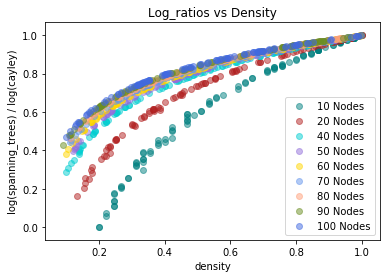

In [4]:
# plot data points
colors = ['teal', 'firebrick', 'darkturquoise', 'mediumpurple', 
          'gold', 'cornflowerblue', 'lightsalmon', 'olivedrab', 'royalblue']

for size, clr in zip(graph_sizes, colors):
    subset = graph_data[graph_data['size'] == size]
    plt.scatter(subset.density, subset.log_ratios, color=clr, alpha=0.5,
              label=str(size) + ' Nodes')

plt.title('Log_ratios vs Density')
plt.xlabel('density')
plt.ylabel('log(spanning_trees) / log(cayley)')
plt.legend()
plt.show()

We can also separate the data points by the number of nodes in a graph and plot them separately. 

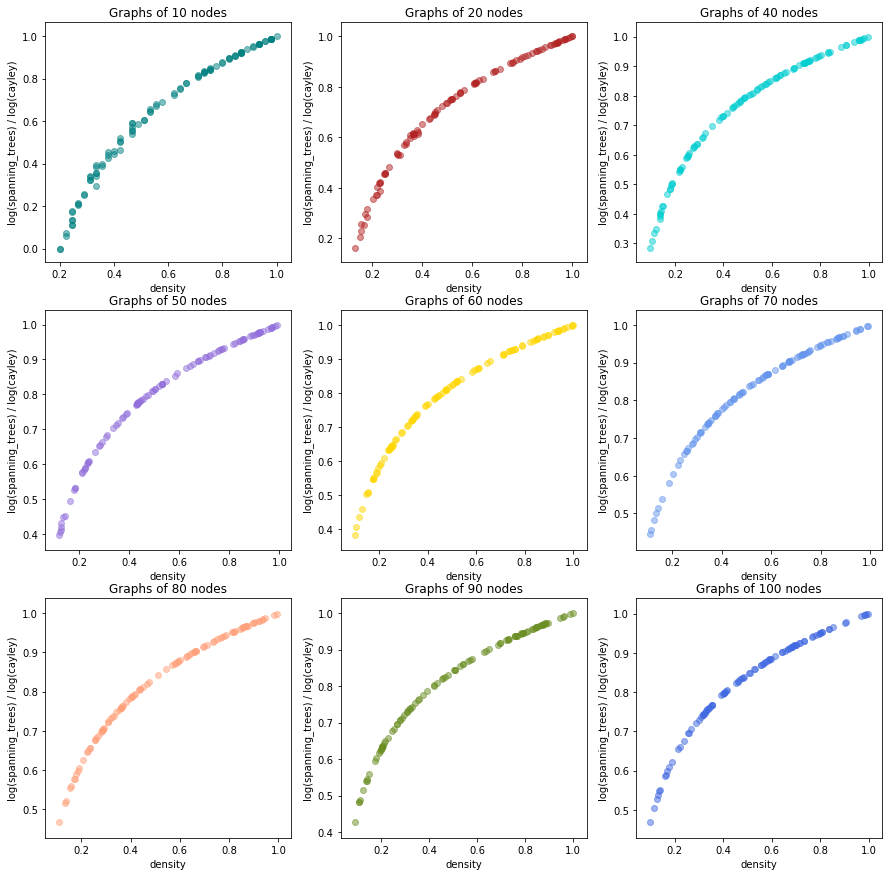

In [5]:
# plot data points
fig, axs = plt.subplots(3, 3, figsize=(15, 15))

for size, ax, clr in zip(graph_sizes, axs.ravel(), colors):
    subset = graph_data[graph_data['size'] == size]
    ax.scatter(subset.density, subset.log_ratios, color=clr, alpha=0.5)
    ax.set(title='Graphs of ' + str(size) + ' nodes', xlabel='density',
           ylabel='log(spanning_trees) / log(cayley)')

plt.show()

This new metric seems to be more sensitive at lower densities, as this is where the slope is steepest. This would make sense since a higher density indicates that a higher proportion of the total possible number of edges exists within a graph. Therefore, the closer the number of spanning trees is to the value returned by the Cayley formula.  
Given this result, it might make more sense to use this metric on sparse graphs as it might indicate some underlying distinction between two graphs of equal density. 

Again, separating the data points by the size of the graph, we can plot their log ratios against the edge connectivity. 

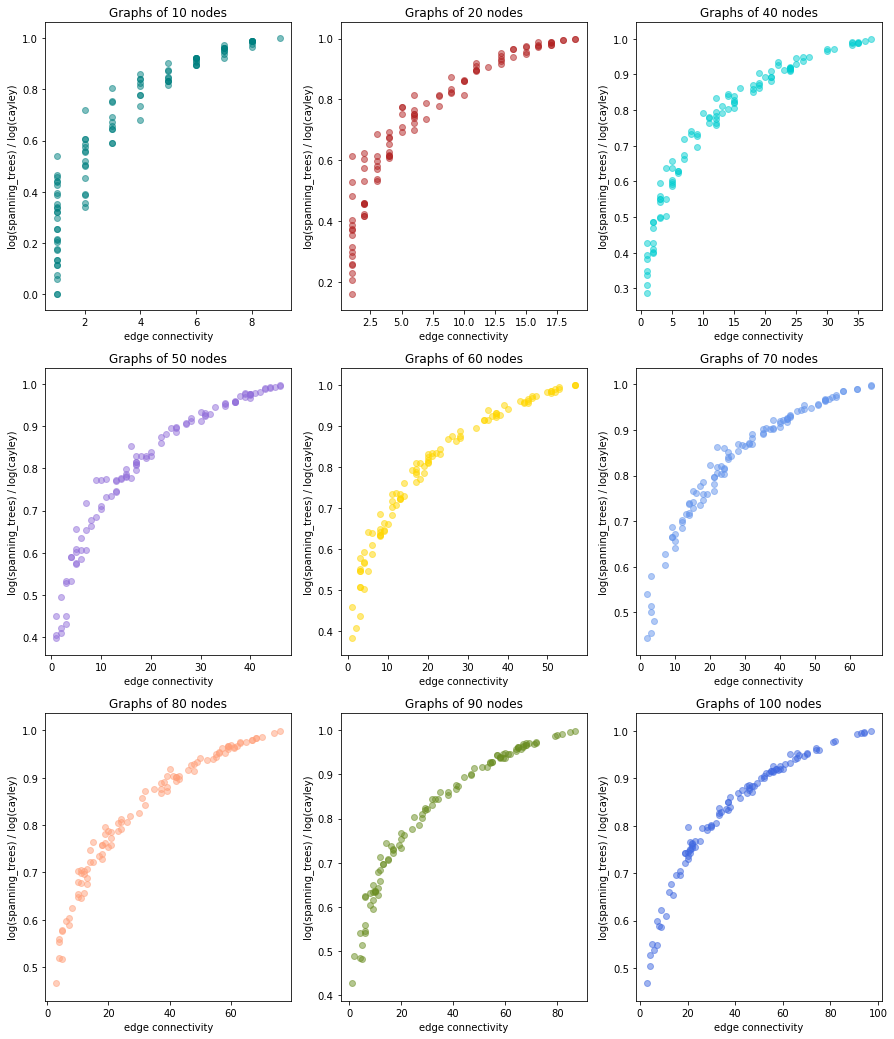

In [6]:
fig, axs = plt.subplots(3, 3, figsize=(15, 18))
for size, ax, clr in zip(graph_sizes, axs.ravel(), colors):
    subset = graph_data[graph_data['size'] == size]
    ax.scatter(subset.edge_connectivity, subset.log_ratios, color=clr, alpha=0.5,
              label=str(size) + ' Nodes')
    ax.set(title='Graphs of ' + str(size) + ' nodes', xlabel='edge connectivity',
           ylabel='log(spanning_trees) / log(cayley)')

plt.show()

These graphs show that as the number of nodes in a graph increases, the clearer the relaionship between our new metric and the edge connectivity becomes.  
The fewer nodes in a graph, the less chance there is of strongly connected clusters.  

Graph G has 10 nodes, 12 edges, 0.26666666666666666 density and 106 spanning trees
Graph H has 10 nodes, 12 edges, 0.26666666666666666 density and 44 spanning trees
Graph T has 10 nodes, 12 edges, 0.26666666666666666 density and 21 spanning trees

The new metric for each of the trees is:
G: 0.25316323315809625
H: 0.2054315845607734
T: 0.16527741184173989


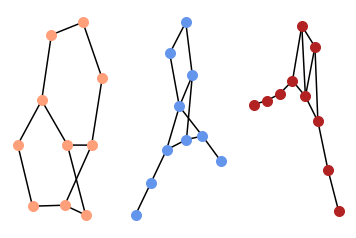

In [7]:
# constructed two graphs with same number of nodes and egdes, but different 
#       number of spanning trees

from networkx.drawing.nx_pylab import draw_kamada_kawai

G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 5), (4, 6), (4, 8), (5, 6), (5, 7),
                 (6, 10), (8, 9), (8, 10), (7, 9)])

H = nx.Graph()
H.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
H.add_edges_from([(1, 2), (1, 3), (2, 4), (2, 5), (3, 5), (4, 6), (4, 7), (5, 6), (5, 7),
                 (6, 8), (7, 9), (8, 10)])

T = nx.Graph()
T.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8, 9, 10])
T.add_edges_from([(1, 2), (1, 3), (1, 4), (2, 4), (2, 6), (3, 4), (3, 5), (4, 6), (5, 7),
                  (6, 8), (7, 9), (8, 10)])

G_spanning_trees = Kirchoff_theorem(G)
H_spanning_trees = Kirchoff_theorem(H)
T_spanning_trees = Kirchoff_theorem(T)

G_metric = log_ratio(G_spanning_trees, 10**8, 10)
H_metric = log_ratio(H_spanning_trees, 10**8, 10)
T_metric = log_ratio(T_spanning_trees, 10**8, 10)

fig, axs = plt.subplots(1, 3)

draw_kamada_kawai(G, ax=axs[0], node_color='lightsalmon', width=1.5, node_size=100)
draw_kamada_kawai(H, ax=axs[1], node_color='cornflowerblue', width=1.5, node_size=100)
draw_kamada_kawai(T, ax=axs[2], node_color='firebrick', width=1.5, node_size=100)

print("Graph G has", len(G.nodes), "nodes,", len(G.edges), "edges,",
      nx.density(G), "density and", G_spanning_trees, "spanning trees")
print("Graph H has", len(H.nodes), "nodes,", len(H.edges), "edges,", 
      nx.density(H), "density and", H_spanning_trees, "spanning trees")
print("Graph T has", len(T.nodes), "nodes,", len(T.edges), "edges,",
      nx.density(T), "density and", T_spanning_trees, "spanning trees")
print('\nThe new metric for each of the trees is:')
print('G:', G_metric)
print('H:', H_metric)
print('T:', T_metric)

Graph G has 20 nodes, 21 edges, 0.11052631578947368 density and 120 spanning trees
Graph H has 20 nodes, 21 edges, 0.11052631578947368 density and 23 spanning trees
The new metric for each of the trees is:
A: 0.08878355580565798
B: 0.05814742680610759


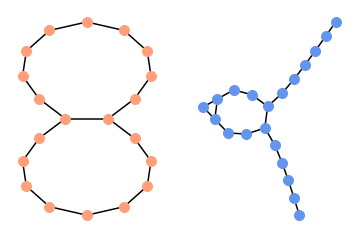

In [8]:
A = nx.Graph()
A.add_nodes_from(range(1, 21))
A.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
                  (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14),
                  (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20),
                  (20, 1), (1, 11)])

B = nx.Graph()
B.add_nodes_from(range(1, 21))
B.add_edges_from([(1, 2), (2, 3), (3, 4), (4, 5), (5, 6), (6, 7), (7, 8),
                  (8, 9), (9, 10), (10, 11), (11, 12), (12, 13), (13, 14),
                  (14, 15), (15, 16), (16, 17), (17, 18), (18, 19), (19, 20),
                  (10, 12), (7, 15)])

A_spanning_trees = Kirchoff_theorem(A)
B_spanning_trees = Kirchoff_theorem(B)

fig, axs = plt.subplots(1, 2)

draw_kamada_kawai(A, ax=axs[0], node_color='lightsalmon', width=1.5, node_size=100)
draw_kamada_kawai(B, ax=axs[1], node_color='cornflowerblue', width=1.5, node_size=100)

print("Graph G has", len(A.nodes), "nodes,", len(A.edges), "edges,",
      nx.density(A), "density and", A_spanning_trees, "spanning trees")
print("Graph H has", len(B.nodes), "nodes,", len(B.edges), "edges,", 
      nx.density(B), "density and", B_spanning_trees, "spanning trees")

A_metric = log_ratio(A_spanning_trees, 20**18, 20)
B_metric = log_ratio(B_spanning_trees, 20**18, 20)

print('The new metric for each of the trees is:')
print('A:', A_metric)
print('B:', B_metric)